In [2]:
# 110_2_Neuron Network Assignment#1 61047061S
# ref:https://youtu.be/QIUxPv5PJOY
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# print(plt.style.available)

In [3]:
# Read the csv file
df = pd.read_csv('1795_history.csv',sep=r'\t')
df['Date'] = pd.to_datetime(df.Date)
df = df.sort_values(by=(['Date']))
# reset the index
df.reset_index(inplace=True)
# delete the 'index' col
del df['index']
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

C:\Users\August\AppData\Local\Temp\ipykernel_9164\1399778227.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('1795_history.csv',sep=r'\t')


In [4]:
df.shape

(2453, 6)

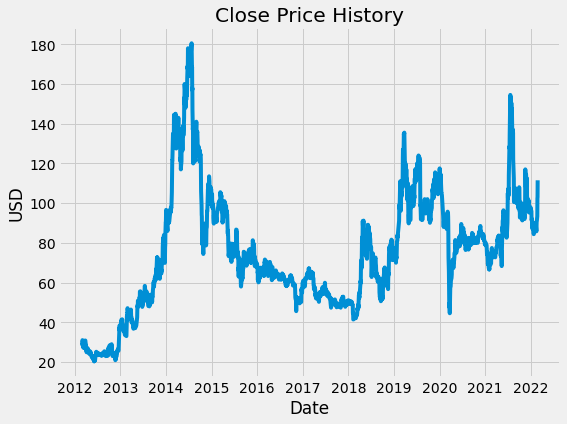

In [5]:
# Visualize the price history
plt.figure(figsize=(8,6))
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('USD')
plt.plot(df['Close'])
plt.show()

In [6]:
# Create a new dataframe with close price
close_data = df.filter(['Close'])
close_dataset = close_data.values
training_data_len = math.ceil(len(close_dataset) * 0.8)
# training_data_len #1963


In [7]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_dataset)
# scaled_data

In [8]:
# Create training dataset
# create the scaled training dataset
train_data = scaled_data[0:training_data_len]

# Split the data into x-train and y-train datasets
x_train = []
y_train = [] # target var

# pass past 60 values to train
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  # if i<=60:
  #   print(x_train)
  #   print(y_train)
  #   print()

In [9]:
# convert train data to array
x_train, y_train = np.array(x_train), np.array(y_train)

# reshape the data
x_train.shape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape # (1903,60,1)

(1903, 60, 1)

In [12]:
# Build LSTM model (architecture)
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1)) # output

NotImplementedError: Cannot convert a symbolic Tensor (lstm_2/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [ ]:
# Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=1,epochs=1)

In [ ]:
# Create testing dataset, containing scaled values
test_data = scaled_data[training_data_len-60: , :]
x_test = []
y_test = close_dataset[training_data_len: , :] # actual values
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
# convert and reshape
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
# Get the models predicted price values
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction) # ideally have same with out y_test dataset


In [ ]:
# Get the RMSE
rmse = np.sqrt(np.mean(prediction - y_test)**2)
rmse

In [ ]:
# Plotting
train = close_data[:training_data_len]
valid = close_data[training_data_len:]
valid['Prediction'] = prediction

# Visualize the data
plt.figure(figsize=(8,6))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price($')
plt.plot(train['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Train',' Val', 'Prediction'], loc='lower right')
plt.show()

In [ ]:
# showing the comparison
valid

In [ ]:
# save the model
model.save("NN_HW1_61047061S")